In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

In [7]:
a=pd.read_csv(r'C:\Users\ubtn\Desktop\IE-05\Data Mining\HW1\Data\bets.csv',sep=str,delimiter=',')
Matches=pd.read_csv(r'C:\Users\ubtn\Desktop\IE-05\Data Mining\HW1\Data\matches.csv',sep=str,delimiter=',')
df=pd.DataFrame(a)
df2=pd.DataFrame(Matches)
#Drop unnecessary columns and merge matches and bets data using match_id
df2=df2.drop(columns=['match_awayteam_id','match_hometeam_id','epoch','match_live','match_hometeam_name','match_awayteam_name','match_status','match_hometeam_halftime_score','match_awayteam_halftime_score','match_hometeam_extra_score','match_awayteam_extra_score','match_hometeam_penalty_score','match_awayteam_penalty_score'])
df=df.merge(df2,on='match_id',how='inner')               
df=df.drop(columns=['match_hometeam_score','match_awayteam_score',])
#filter Premier League
df=df[df['league_id']==148]
df2=df2[df2['league_id']==148]
bookmakers=['BetOlimp','Betrally','Marathonbet','Tempobet']
vrb=['odd_1','odd_x','odd_2']
#remove unnecessary rows
df=df[df.loc[:,'odd_bookmakers'].isin(bookmakers)]
df=df[df.loc[:,'variable'].isin(vrb)]
#sort in ascending order of match_id's
df=df.sort_values('match_id',ascending=True)
df2=df2.sort_values('match_id',ascending=True)
#Check data
print(df.head(10))
df2['isdraw']=df2.match_hometeam_score==df2.match_awayteam_score
print(df2.head(10))

       match_id odd_bookmakers   odd_epoch variable  value  league_id
259      150842    Marathonbet  1486711421    odd_1   5.20        148
261      150842    Marathonbet  1486711421    odd_x   3.70        148
263      150842    Marathonbet  1486711421    odd_2   1.75        148
548      150844    Marathonbet  1486711426    odd_1   3.10        148
551      150844    Marathonbet  1486711426    odd_x   3.30        148
554      150844    Marathonbet  1486711426    odd_2   2.44        148
80853    156845       BetOlimp  1489826601    odd_1   2.28        148
80870    156845    Marathonbet  1489826601    odd_1   2.38        148
80879    156845       Tempobet  1489826601    odd_1   2.35        148
80909    156845       BetOlimp  1489826601    odd_x   2.98        148
     match_id  match_hometeam_score  match_awayteam_score  league_id  isdraw
357     13274                   2.0                   0.0        148   False
349     13275                   1.0                   1.0        148    True

In [8]:
#Calculate the probabilities and add them to dataframe
p=1/df['value']
p=p.round(4)
df['p']=p
print(df.head())

     match_id odd_bookmakers   odd_epoch variable  value  league_id       p
259    150842    Marathonbet  1486711421    odd_1   5.20        148  0.1923
261    150842    Marathonbet  1486711421    odd_x   3.70        148  0.2703
263    150842    Marathonbet  1486711421    odd_2   1.75        148  0.5714
548    150844    Marathonbet  1486711426    odd_1   3.10        148  0.3226
551    150844    Marathonbet  1486711426    odd_x   3.30        148  0.3030


In [13]:
pptotal=[]
p1total=[]
ptotal=df.groupby(["match_id",'odd_bookmakers'])["p"].sum()
pcount=df.groupby(["match_id",'odd_bookmakers'])["p"].count()
for i in range(len(ptotal)):
    pp=ptotal[i].repeat(pcount[i])
    pptotal=np.append(pptotal,pp)
#calculate and add p_norm
df['p_norm']=df.p/pptotal
print(df.tail())

         match_id odd_bookmakers   odd_epoch variable  value  league_id  \
1187704    307209       BetOlimp  1533876515    odd_x   3.32        148   
1187696    307209       BetOlimp  1533876515    odd_1   3.37        148   
1187771    307209    Marathonbet  1569306866    odd_x   3.64        148   
1187721    307209    Marathonbet  1569306866    odd_1   2.10        148   
1187821    307209    Marathonbet  1569306866    odd_2   3.64        148   

              p    p_norm  
1187704  0.3012  0.290062  
1187696  0.2967  0.285728  
1187771  0.2747  0.267843  
1187721  0.4762  0.464314  
1187821  0.2747  0.267843  


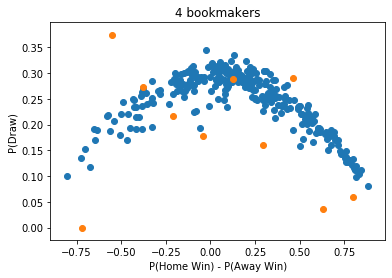

In [16]:
#Obtain x and y values for scatterplot and draw the scatterplot
pho=df[df['variable']=='odd_1'].groupby(['match_id'])['p'].mean()
pdr=df[df['variable']=='odd_x'].groupby(['match_id'])['p'].mean()
paw=df[df['variable']=='odd_2'].groupby(['match_id'])['p'].mean()
px=pho-paw
py=pdr
plt.scatter(px,py)
#merge p(Home)-p(Away) column to Matches data
df3=df2.merge(px,on='match_id',how='inner')
#Get the histogram
y, bins=np.histogram(df3['p'])
x=np.histogram(df3[df3.isdraw==True]['p'],bins)[0]
rng=[]
rng.append((bins[:-1] +bins[1:] )/2)
plt.scatter(rng,x/y)
# Give names to the x and y axes
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('4 bookmakers')
plt.show()

In [17]:
#Task 3.4
#Create 4 dataframes for each bookmaker chosen and repeat Task3.3

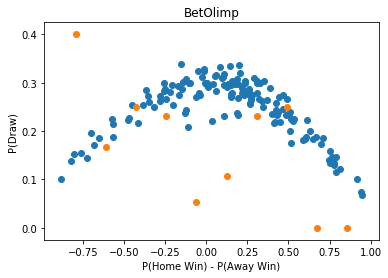

In [18]:
d_1=df[df.loc[:,'odd_bookmakers']=='BetOlimp']
d_2=df[df.loc[:,'odd_bookmakers']=='Betrally']
d_3=df[df.loc[:,'odd_bookmakers']=='Marathonbet']
d_4=df[df.loc[:,'odd_bookmakers']=='Tempobet']
#Perform the same tasks in 3.3
pho_1=d_1[d_1['variable']=='odd_1'].groupby(['match_id'])['p'].mean()
pdr_1=d_1[d_1['variable']=='odd_x'].groupby(['match_id'])['p'].mean()
paw_1=d_1[d_1['variable']=='odd_2'].groupby(['match_id'])['p'].mean()
px_1=pho_1-paw_1
py_1=pdr_1
plt.scatter(px_1,py_1)
df3_1=df2.merge(px_1,on='match_id',how='inner')
y_1, bins_1=np.histogram(df3_1['p'])
x_1=np.histogram(df3_1[df3_1.isdraw==True]['p'],bins_1)[0]
rng_1=[]
rng_1.append((bins_1[:-1] +bins_1[1:] )/2)
plt.scatter(rng_1,x_1/y_1)
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('BetOlimp')
plt.show()

In [19]:
#There is no bias in odds.

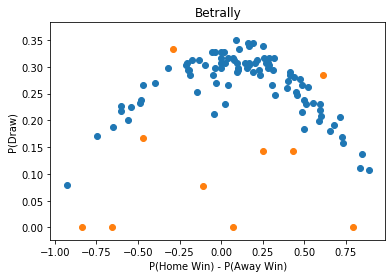

In [20]:
pho_2=d_2[d_2['variable']=='odd_1'].groupby(['match_id'])['p'].mean()
pdr_2=d_2[d_2['variable']=='odd_x'].groupby(['match_id'])['p'].mean()
paw_2=d_2[d_2['variable']=='odd_2'].groupby(['match_id'])['p'].mean()
px_2=pho_2-paw_2
py_2=pdr_2
plt.scatter(px_2,py_2)
df3_2=df2.merge(px_2,on='match_id',how='inner')
y_2, bins_2=np.histogram(df3_2['p'])
x_2=np.histogram(df3_2[df3_2.isdraw==True]['p'],bins_2)[0]
rng_2=[]
rng_2.append((bins_2[:-1] +bins_2[1:] )/2)
plt.scatter(rng_2,x_2/y_2)
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('Betrally')
plt.show()

In [21]:
#There is no bias in odds.

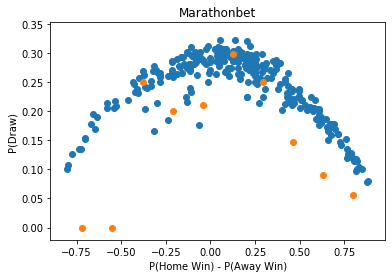

In [22]:
pho_3=d_3[d_3['variable']=='odd_1'].groupby(['match_id'])['p'].mean()
pdr_3=d_3[d_3['variable']=='odd_x'].groupby(['match_id'])['p'].mean()
paw_3=d_3[d_3['variable']=='odd_2'].groupby(['match_id'])['p'].mean()
px_3=pho_3-paw_3
py_3=pdr_3
plt.scatter(px_3,py_3)
df3_3=df2.merge(px_3,on='match_id',how='inner')
y_3, bins_3=np.histogram(df3_3['p'])
x_3=np.histogram(df3_3[df3_3.isdraw==True]['p'],bins_3)[0]
rng_3=[]
rng_3.append((bins_3[:-1] +bins_3[1:] )/2)
plt.scatter(rng_3,x_3/y_3)
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('Marathonbet')
plt.show()

In [23]:
#There is no bias in odds.

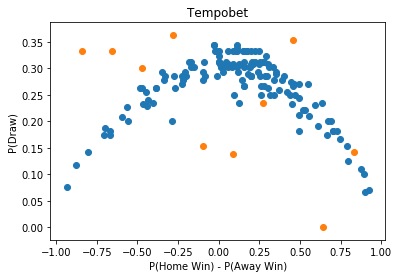

In [24]:
pho_4=d_4[d_4['variable']=='odd_1'].groupby(['match_id'])['p'].mean()
pdr_4=d_4[d_4['variable']=='odd_x'].groupby(['match_id'])['p'].mean()
paw_4=d_4[d_4['variable']=='odd_2'].groupby(['match_id'])['p'].mean()
px_4=pho_4-paw_4
py_4=pdr_4
plt.scatter(px_4,py_4)
df3_4=df2.merge(px_4,on='match_id',how='inner')
y_4, bins_4=np.histogram(df3_4['p'])
x_4=np.histogram(df3_4[df3_4.isdraw==True]['p'],bins_4)[0]
rng_4=[]
rng_4.append((bins_4[:-1] +bins_4[1:] )/2)
plt.scatter(rng_4,x_4/y_4)
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draw)')
plt.title('Tempobet')
plt.show()

In [25]:
#There is a bias in this graph. In other words, one can make money in the long run.